In [11]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import math

from opentisim.containers import container_objects
from opentisim.containers import container_defaults
from opentisim.containers import container_system

from opentisim.core import core
from opentisim.plot import plot

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [12]:
startyear = 2021
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [13]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(300_000)
    else:
        demand.append(750_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

## 0.2 Generate vessels

In [14]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax_data = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax_data, VLCS, ULCS] 

# 1. Instatiate terminal system

In [ ]:
# Terminal_calcs=[]
# stack_cranes = ['rtg', 'rmg', 'sc', 'rs']
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for crane in stack_cranes:   
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                                              lifecycle = lifecycle, 
#                                              elements = demand + vessels, 
#                                              operational_hours = 8500,   
#                                              debug=False,
#                                              stack_equipment = crane,
#                                              laden_stack = crane) 
#     NPV, data=Terminal_dummy.simulate()
#     Terminal_calcs.append(data)
# print(Terminal_calcs)


In [ ]:
# def chunkIt(seq, num):
#     avg = len(seq) / float(num)
#     out = []
#     last = 0.0

#     while last < len(seq):
#         out.append(seq[int(last):int(last + avg)])
#         last += avg

#     return out

In [ ]:
# Terminal_calcs=[]
# data_overview = []
# stack_cranes = ['rtg', 'rmg', 'sc', 'rs']
# fuel_costs = [0.1, 0.5, 1, 2]
# power_costs = [0.0, 0.05, 0.1, 0.32]
# land_costs = [0, 50, 100, 375]


# for crane in stack_cranes:
#     for i in power_costs: 
#         Terminal_dummy = container_system.System(startyear = startyear, 
#                                                  lifecycle = lifecycle, 
#                                                  elements = demand + vessels, 
#                                                  operational_hours = 7500,   
#                                                  debug=False,
#                                                  stack_equipment = crane,
#                                                  laden_stack = crane,
#                                                  energy_price = i ) 
#         NPV, data=Terminal_dummy.simulate()
#         Terminal_calcs.append(NPV)
#         data_overview.append(data)
        
# print(Terminal_calcs)
# print(data_overview)


In [ ]:
# out=chunkIt(Terminal_calcs, len(land_costs))

# rtg=out[0]
# rmg=out[1]
# sc=out[2]
# rs=out[3]

# # rtg=[-205500000, -248300000, -304000000, -368240000]
# # rmg=[-234270000, -272064000, -321630000, -378327000]
# # sc=[-241610000, -281480000, -333630000, -393442000]
# # rs=[-217999000, -264414772, -324757000, -393380000]

# ind = np.arange(4)  # the x locations for the groups
# width = 0.1       # the width of the bars


# fig, ax = plt.subplots(figsize=(16, 7))
# ax.bar(ind, rtg, width = width, label ="RTG", color = 'coral')
# ax.bar(ind+width, rmg, width = width, label="RMG", color = 'darkcyan')
# ax.bar(ind+2*width, sc, width = width, label="Straddle carrier", color = 'darkkhaki')
# ax.bar(ind+3*width, rs, width = width, label="Reach stacker", color = 'cornflowerblue')
# ax.set_xticks(ind+3*width/3)
# ax.set_xticklabels(('20', '40', '70', '100'))
# plt.ylabel('Net present value [00 M USD]')
# plt.xlabel('Cost of labour [k USD/FTE]')
# plt.legend()
# ax.set_title('NPV per equipment for varying cost of labour')
# plt.show()
# plt.savefig('C:/Users/908538/Google Drive/Afstuderen/02. Model/Masterfile/Plots/fuel.png', dpi=400)


In [15]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7500,  
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data) 
Terminal.modelframe = list(range(startyear, startyear + lifecycle))

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [16]:
Terminal.simulate()


### Simulate year: 2021 ############################
--- Cargo volume and vessel calls for 2021 ---------
  Total cargo volume: 300000
  Total vessel calls: 192
     Fully cellular calls: 0
     Panamax calls: 0
     Panamax max calls: 0
     Post Panamax I calls: 0
     Post Panamax II calls: 0
     New Panamax calls: 192
     VLCS calls: 0
     ULCS calls: 0
----------------------------------------------------

--- Status terminal @ start of year ----------------
     Planned waiting time service time factor (@ start of year): inf (trigger level: 0.10)

--- Start investment analysis ----------------------

$$$ Check berth elements (coupled with berth occupancy) ---------------
  *** add Berth to elements
  *** add Quay to elements
  *** add STS crane to elements
     Berth occupancy planned (after adding berth): 0.76)
     Planned waiting time service time factor : 1.57 (trigger level: 0.10)
  *** add STS crane to elements
     Berth occupancy planned (after adding berth): 0.46)
   

     a total of 0 empty handlers is online; 10 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 11 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 12 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 13 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 14 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 15 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 16 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 17 empty handlers still pending
  *** add empty handler to elements
     a total of 0 empty handlers is online; 18 empty handlers still pending
  *** add empty handler to e

     a total of 16 stack equipment is online; 4 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 5 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 6 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 7 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 8 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 9 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 10 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 11 stack equipment still pending
  *** add stack equipment to elements
     a total of 16 stack equipment is online; 12 stack equipment still

## Report all elements

In [17]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year  volume
0  2021  300000
1  2022  300000
2  2023  300000
3  2024  300000
4  2025  300000
5  2026  750000
6  2027  750000
7  2028  750000
8  2029  750000
9  2030  750000, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 0, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 0, 'new_panamax_perc': 100, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': '6b0af84a-fd28-11eb-aea4-50eb7151fd2d'}

Fully_Cellular_1

{'type': 'Fully_Cellular', 'delivery_time': 0, 'call_size': 312.5, 'LOA': 215, 'draught': 10.0, 'beam': 20.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'transport_costs': 200, 'all_in_transport_costs': 2128, 'name': 'Fully_Cellular_1', 'id': '6bb57a5a-fd28-11eb-ab79-50eb7151fd2d'}

Panamax_1

{'type': 'Panamax', 'delivery_time': 0, 'call_size': 425.0, 'LOA': 250, 'draught': 12.5, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'de

9  2030      0.0       8500.0  125000.0}

Tractor-trailer

{'triggers': [], 'labour': 125000, 'maintenance': 8500.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'non_essential_moves': 1.2, 'year_purchase': [], 'year_online': 2028, 'name': 'Tractor-trailer', 'id': '6e0d778a-fd28-11eb-9cdc-50eb7151fd2d', 'shift': 5, 'df':    year    capex  maintenance    labour
0  2021      0.0          0.0       0.0
1  2022      0.0          0.0       0.0
2  2023      0.0          0.0       0.0
3  2024      0.0          0.0       0.0
4  2025      0.0          0.0       0.0
5  2026      0.0          0.0       0.0
6  2027  86000.0          0.0       0.0
7  2

In [18]:
cash_flows, cash_flows_WACC_real = core.add_cashflow_elements(Terminal)

   year       capex  capex_material  maintenance    insurance  energy  \
0  2021  45128117.4               0        0.000        0.000       0   
1  2022  96279785.6               0        0.000        0.000       0   
2  2023         0.0               0  2683362.291  1102135.291       0   
3  2024         0.0               0  2683362.291  1102135.291       0   
4  2025         0.0               0  2683362.291  1102135.291       0   
5  2026  56582576.8               0  2683362.291  1102135.291       0   
6  2027  48280677.2               0  3285162.291  1302135.291       0   
7  2028         0.0               0  5020037.222  1863152.222       0   
8  2029         0.0               0  5020037.222  1863152.222       0   
9  2030         0.0               0  5020037.222  1863152.222       0   

       labour  fuel  purchaseH2  purchase_material  demurrage  revenues  
0         0.0     0           0                  0          0         0  
1         0.0     0           0                 

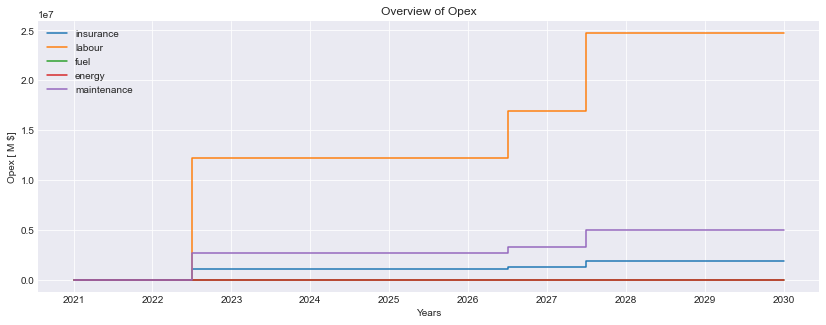

In [19]:
Terminal.opex_plot(cash_flows)

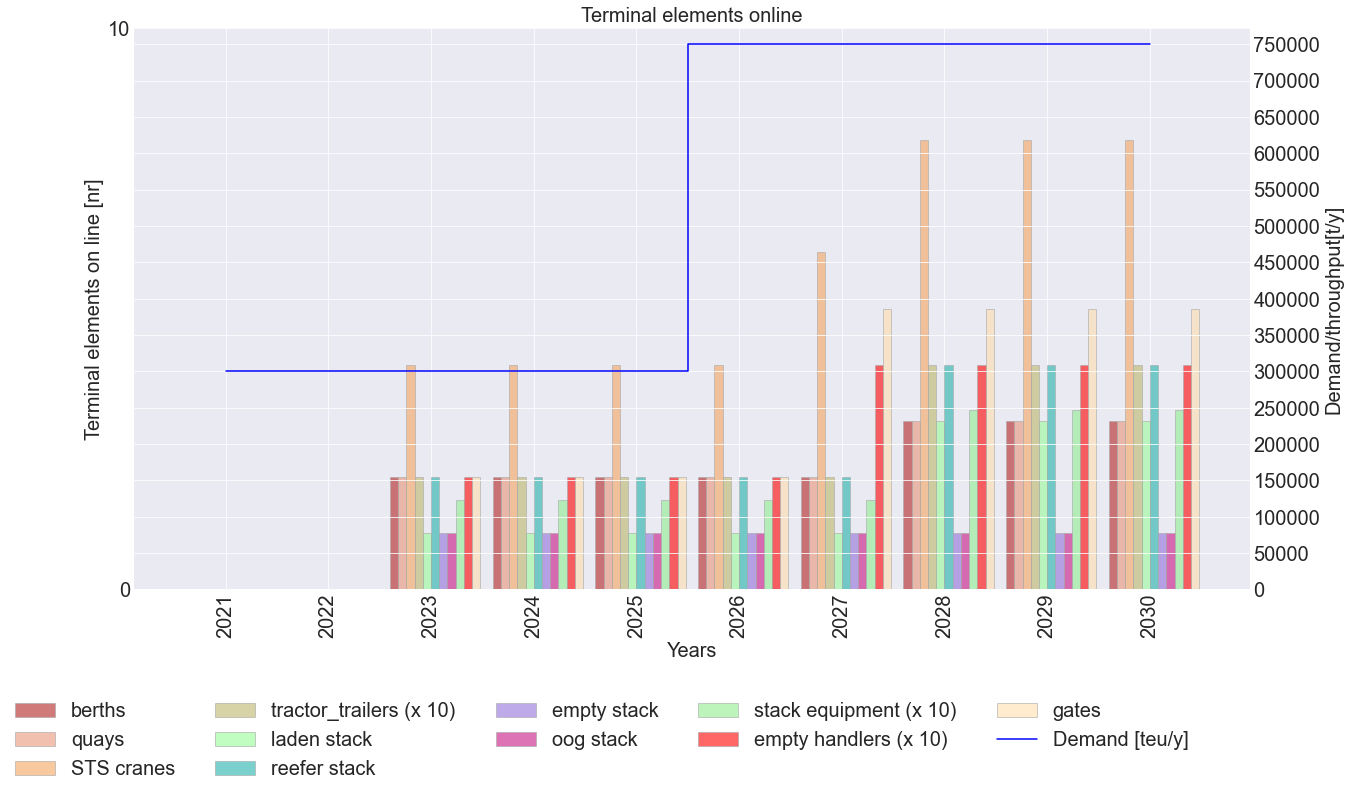

In [20]:
Terminal.terminal_elements_plot()

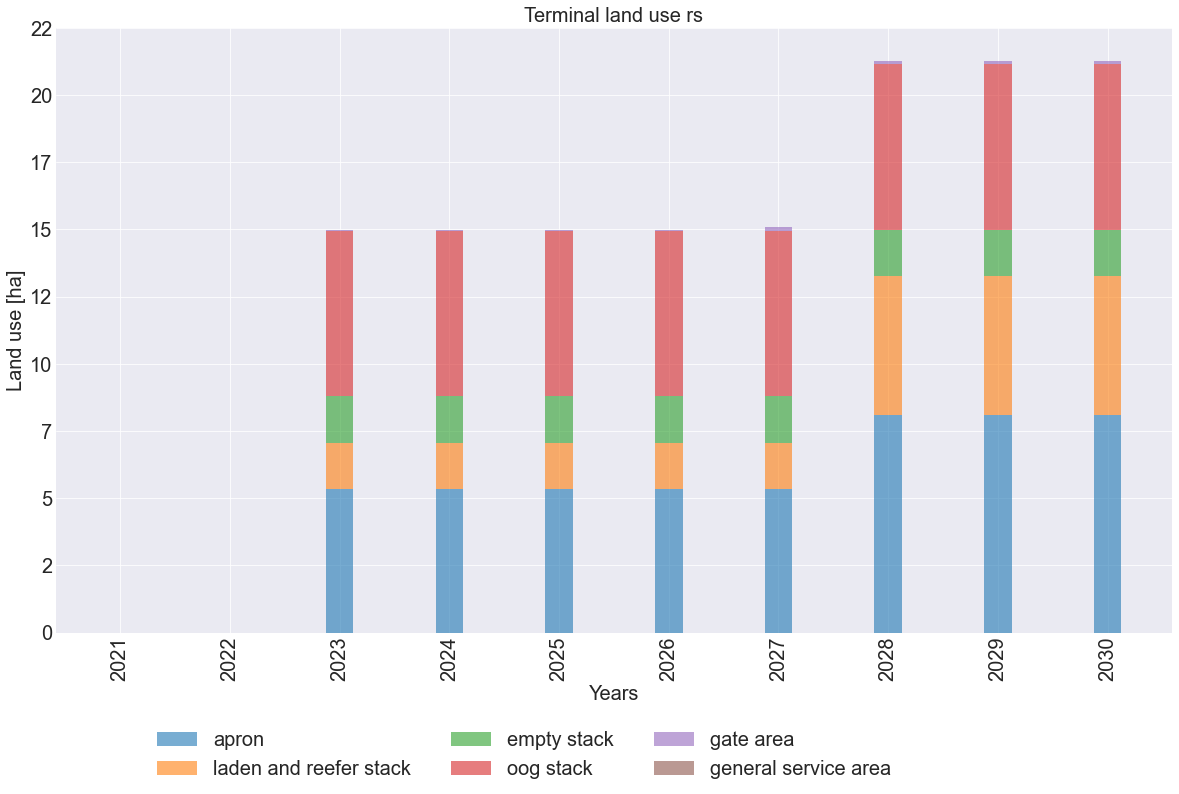

In [21]:
Terminal.land_use_plot()

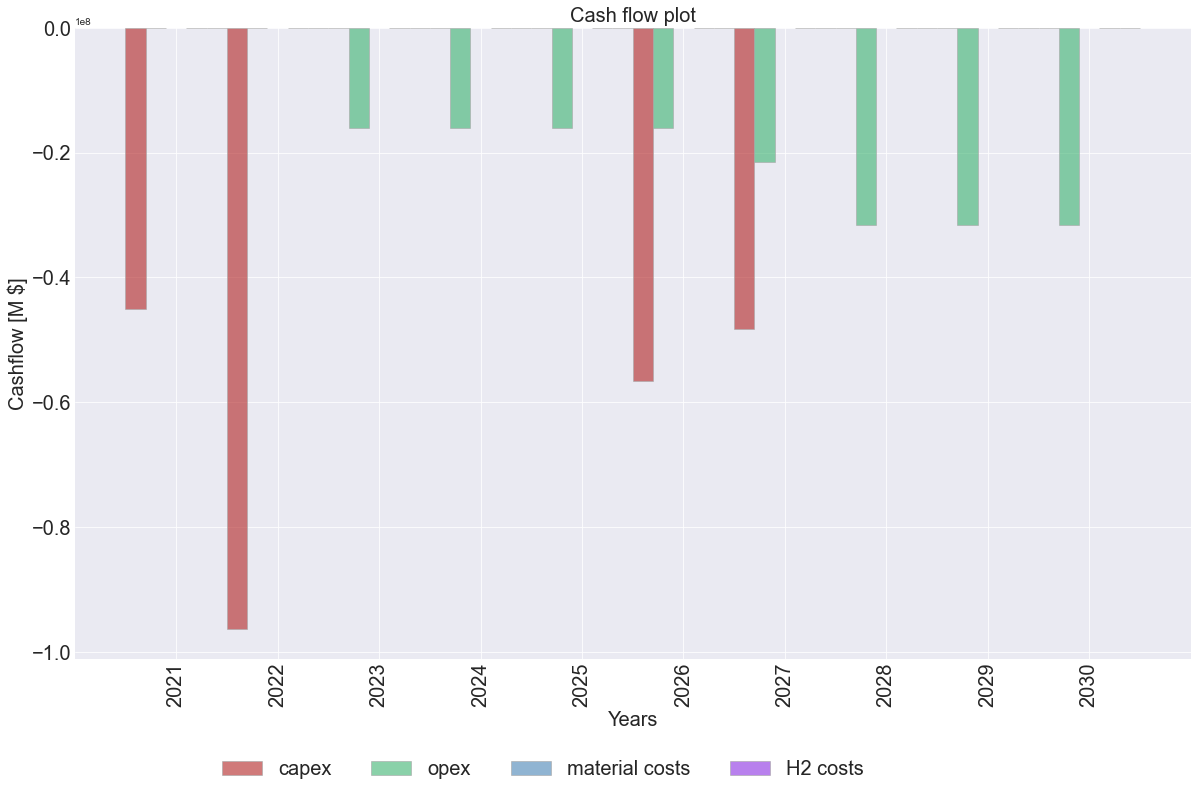

In [23]:
plot.cashflow_plot(cash_flows)

## SandBox

In [24]:
core.NPV(Terminal)

,CAPEX,OPEX,REVENUES,PV,cum-PV
2021,-4.178529e+07,-0.000000e+00,0.0,-4.178529e+07,-4.178529e+07
2022,-8.254440e+07,-0.000000e+00,0.0,-8.254440e+07,-1.243297e+08
2023,-0.000000e+00,-1.272949e+07,0.0,-1.272949e+07,-1.370592e+08
2024,-0.000000e+00,-1.178657e+07,0.0,-1.178657e+07,-1.488458e+08
2025,-0.000000e+00,-1.091349e+07,0.0,-1.091349e+07,-1.597592e+08
2026,-3.565662e+07,-1.010508e+07,0.0,-4.576170e+07,-2.055210e+08
2027,-2.817131e+07,-1.252304e+07,0.0,-4.069436e+07,-2.462153e+08
2028,-0.000000e+00,-1.709043e+07,0.0,-1.709043e+07,-2.633057e+08
2029,-0.000000e+00,-1.582447e+07,0.0,-1.582447e+07,-2.791302e+08
2030,-0.000000e+00,-1.465229e+07,0.0,-1.465229e+07,-2.937825e+08
